## Observations and Insights 

## Dependencies and Starter Code

In [202]:
# %matplotlib inline
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

## MouseMeta Data

In [203]:
#check data before combining, clean data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


## Study Result Data

In [204]:
#check data before combining
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Datas Combined

In [251]:
# Combine the data into a single dataset merge left and right you are picking the column name that they Match. 
combined_data  = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## .info() Checking columns for values and type 

In [252]:
# Review the information on the newly created merged dataframe
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
Mouse ID              1893 non-null object
Drug Regimen          1893 non-null object
Sex                   1893 non-null object
Age_months            1893 non-null int64
Weight (g)            1893 non-null int64
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


### Checked Duplicate Mouse ID

In [255]:
# Checking the number of mice for any duplicates.
combined_data.duplicated(['Mouse ID']).sum()

1644

### Removed Duplicates

In [207]:
# Creating a New DataFrame and Dropping Duplicates
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.
clean_data = combined_data.drop_duplicates(["Mouse ID"], keep="last")
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [248]:
######### NOT SURE, Question?? ################
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseId_timepoint = clean_data.groupby(["Mouse ID"])
mouseId_timepoint_df = pd.DataFrame(mouseId_timepoint["Timepoint"].count())
mouseId_timepoint_df = mouseId_timepoint_df.reset_index()

In [209]:
# Optional: Get all the data for the duplicate mouse ID. 

## Summary Statistics 

In [249]:
# Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_data1 = clean_data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
meanStat = round(group_data1['Tumor Volume (mm3)'].mean(),2)
medianStat = round(group_data1['Tumor Volume (mm3)'].median(),2)
varStat  = round(group_data1['Tumor Volume (mm3)'].var(),2)
stdStat  = round(group_data1['Tumor Volume (mm3)'].std(),2)
semStat = round(group_data1['Tumor Volume (mm3)'].sem(),2)


# Assemble the resulting series into a single summary dataframe.

summary_stats_df= pd.DataFrame({"Mean":meanStat,
                                "Median":medianStat,
                                "Variance":varStat,
                                " STD ":stdStat,
                                " SEM ":semStat})

summary_stats_df = summary_stats_df.sort_index()
summary_stats_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


## Summary Statistics  (using aggregation method .agg )

In [211]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
group_data = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

summary_stats_ag = round(group_data.agg(['mean','median', 'var','std','sem']),2)

# Instead of just printing summary_stats, I created a DataFrame to print a nicer table
summary_stats_ag_df = pd.DataFrame({"Tumor_Vol_Mean":summary_stats_ag['mean'],
                                    "Tumor_Vol_Median":summary_stats_ag['median'],
                                    "Tumor_Vol_Variance":summary_stats_ag['var'],
                                    "Tumor_Vol_STD ":summary_stats_ag['std'],
                                    "Tumor_Vol_SEM":summary_stats_ag['sem']})

summary_stats_ag_df = summary_stats_ag_df.sort_index()
summary_stats_ag_df

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Variance,Tumor_Vol_STD,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


## Bar Graph (using Pandas  )

<IPython.core.display.Javascript object>


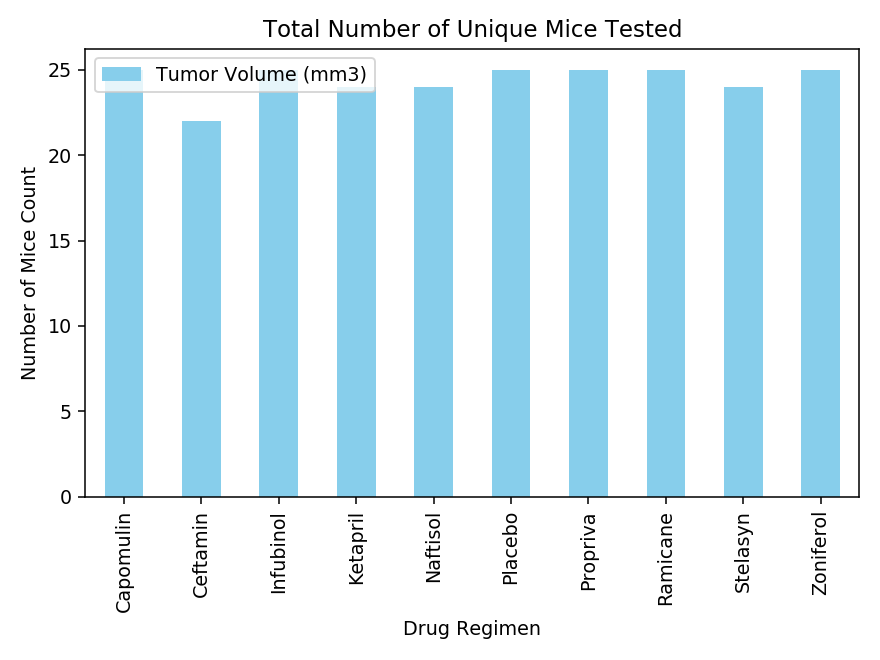

In [273]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Create a dataframe counting the total number of unique mice tested for each Drug Regimen
mice_tested = pd.DataFrame(group_data.nunique())

# Create a bar chart and label the title
panda_bar = mice_tested.plot.bar(title='Total Number of Unique Mice Tested', color='skyblue')

# Set the x_label and y_label using class methods
panda_bar.set_xlabel("Drug Regimen")
panda_bar.set_ylabel("Number of Mice Count")
plt.tight_layout()

# Save the graph image
plt.savefig("Images/PandaBarChart.png")

# Display Graph
plt.show()

## Bar Graph (using Pyplot)

<IPython.core.display.Javascript object>


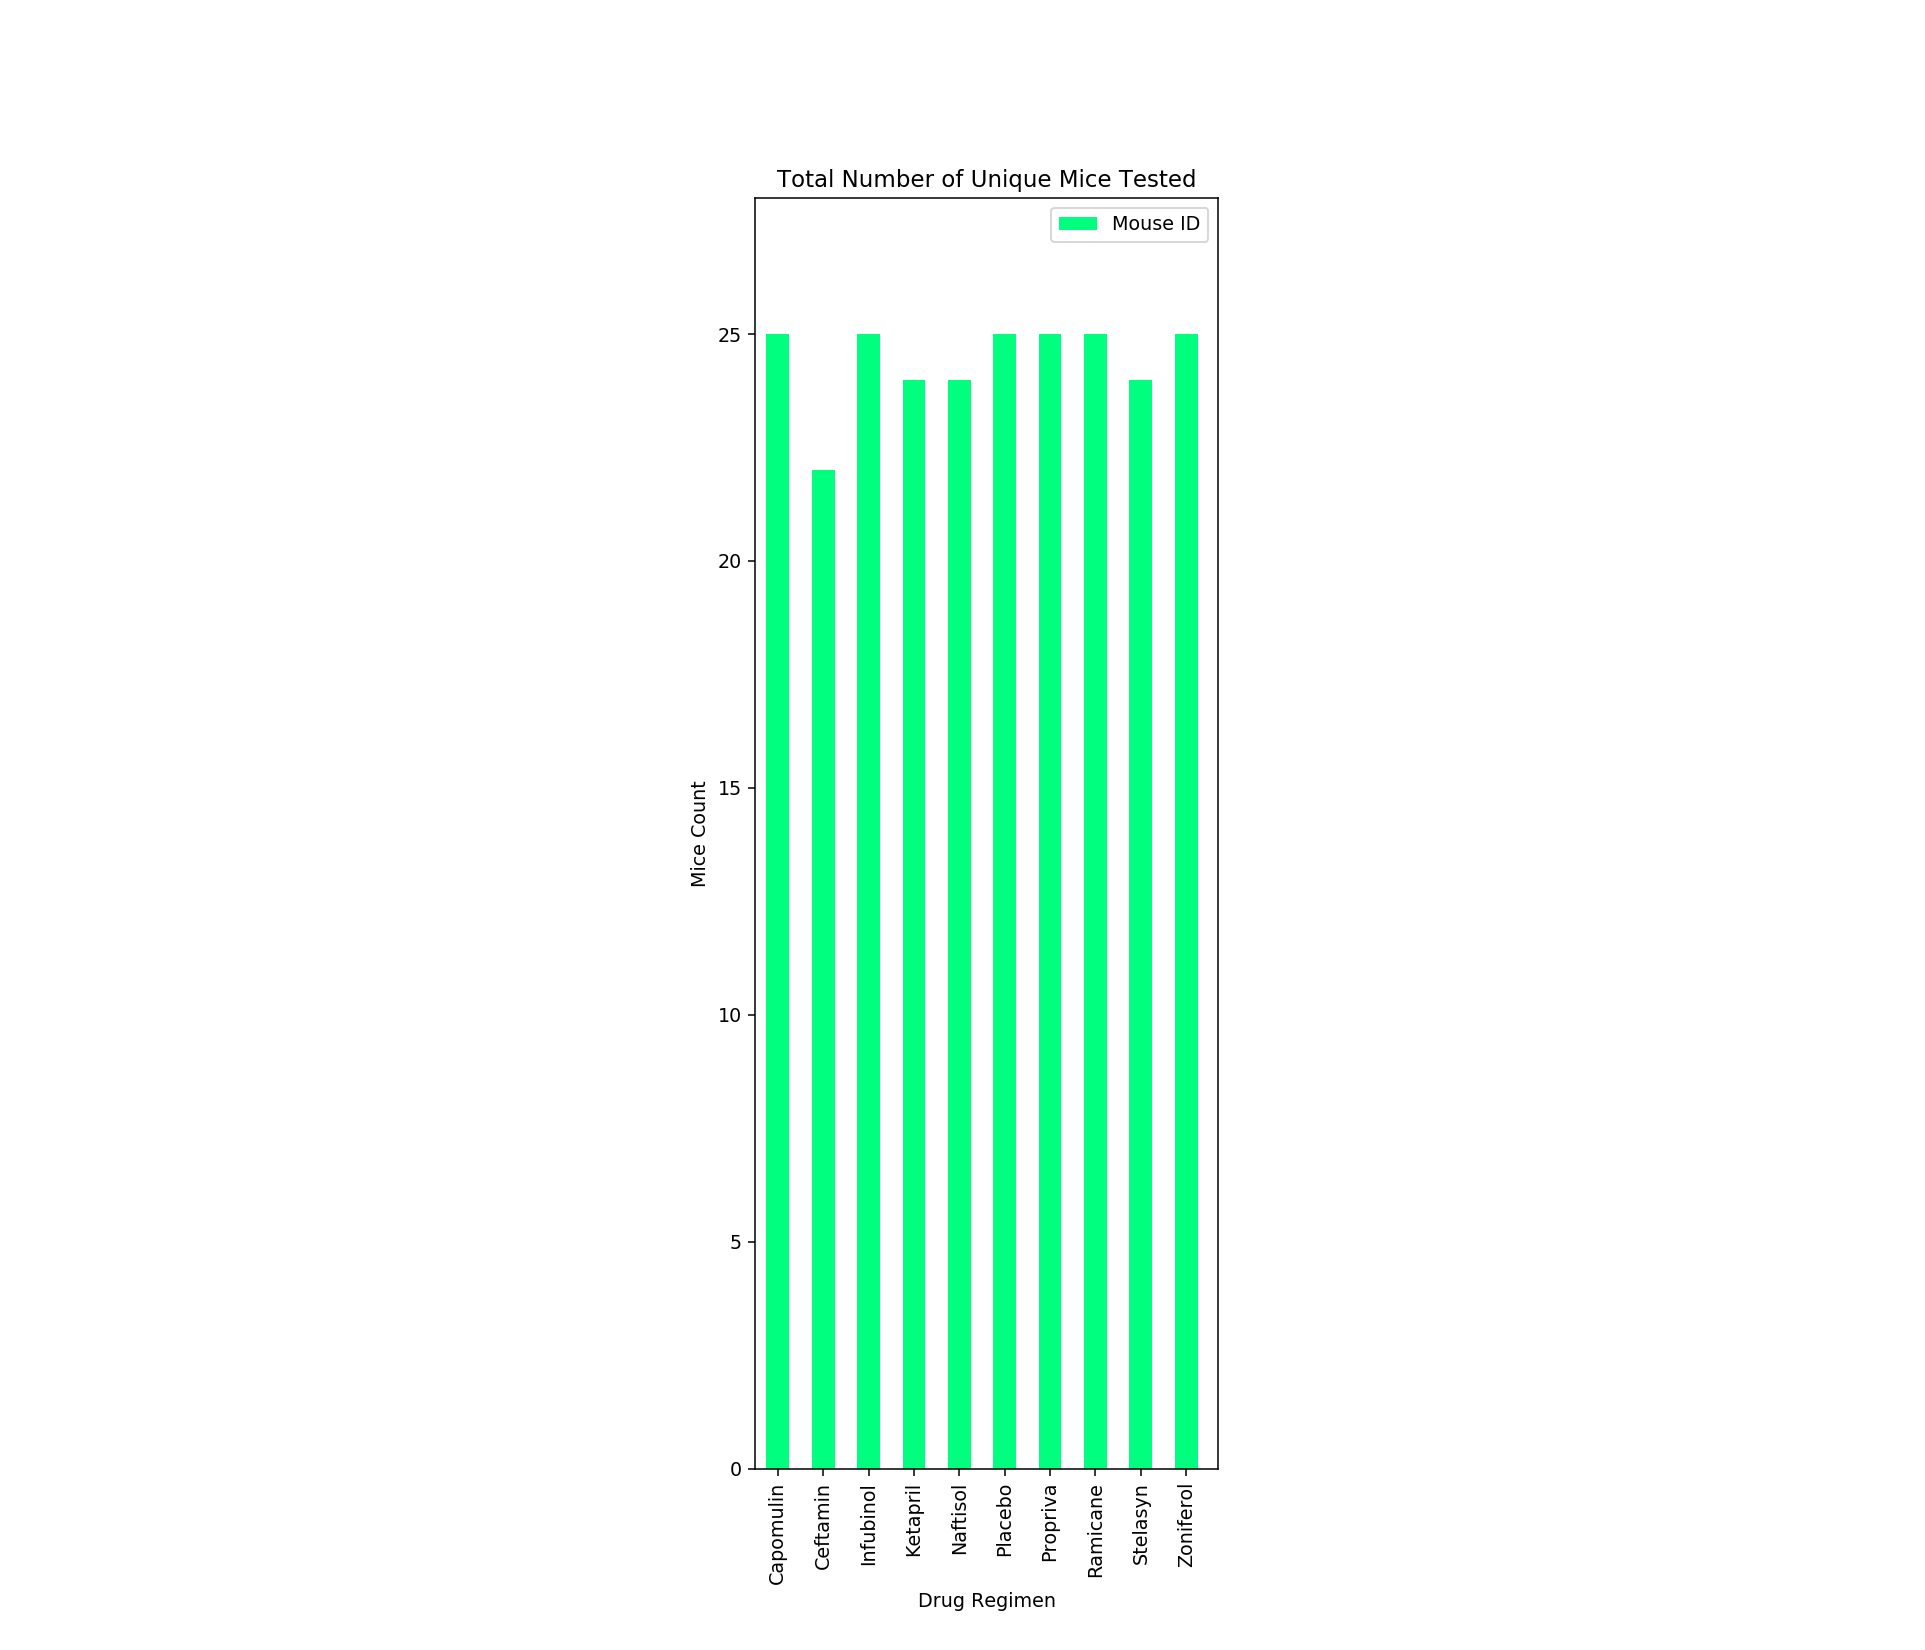

In [274]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Used the same groupby dataframe from above 'mice_tested'
# Set x axis and tick locations
x_axis = np.arange(len(mice_tested))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space

plt.figure(figsize=(14,12))

plt.bar(x_axis, mice_tested['Tumor Volume (mm3)'], color='springgreen', align="center", width = 0.50)

plt.xticks(tick_locations, list(mice_tested.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.5, len(x_axis)-0.3)
plt.ylim(0, 28)

# Set a Title and labels
plt.title("Total Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

##Definign column name
column_name = ["Mouse ID"]

# Printing graph legend on graph
plt.legend(column_name,loc="best")

# Save the graph image
plt.savefig("Images/PyplotBarChart.png")

# Display Graph
plt.show()

## Pie Charts

Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.

**NOTE:** These plots should look identical.

#### We need to create a DataFrame to group by 'Sex' column

In [275]:
gender_group = clean_data.groupby("Sex")
gender_df= pd.DataFrame(gender_group["Sex"].count())
gender_df

,Sex
Sex,
Female,124
Male,125


## Pie Graph(using pandas)

In [283]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Creating a Pie Chart using gender_group by "Sex"
gender_df.plot.pie(y ='Sex', 
                   title ="Male Mice and Female Mice Distribution",
                   startangle=140, 
                   autopct="%1.1f%%", 
                   shadow=True,
                   startangle=90
                   fontsize=20, 
                   colors=["plum", "dodgerblue"],
                   legend =False,
                   explode=0,0.1)

# Setting axis to equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
plt.savefig("Images/PandaPieChart.png")
plt.show()

SyntaxError: invalid syntax (<ipython-input-283-a8979adadbe3>, line 11)

## Pie Graph (using pyplot)

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [83]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [84]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [85]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [86]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [87]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
